In [9]:
#Importing the needed libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Reading the data from the CSV file
df = pd.read_csv('high_diamond_ranked_10min.csv')

In [4]:
#getting an initial look into the data
print(df)

          gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  \
0     4519157822         0               28                   2   
1     4523371949         0               12                   1   
2     4521474530         0               15                   0   
3     4524384067         0               43                   1   
4     4436033771         0               75                   4   
...          ...       ...              ...                 ...   
9874  4527873286         1               17                   2   
9875  4527797466         1               54                   0   
9876  4527713716         0               23                   1   
9877  4527628313         0               14                   4   
9878  4523772935         1               18                   0   

      blueFirstBlood  blueKills  blueDeaths  blueAssists  blueEliteMonsters  \
0                  1          9           6           11                  0   
1                  0          5      

In [5]:
#Checking to see if there are any missing values in the data
null_cols = df.isnull().any()
if null_cols.any():
    print("These columns have missing values:")
    print(null_cols[null_cols == True].index)
else:
    print("None of the columns have missing values")

None of the columns have missing values


In [7]:
#Getting a list of all of the column names
column_names = list(df.columns)
print(column_names)

['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters', 'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed', 'redFirstBlood', 'redKills', 'redDeaths', 'redAssists', 'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed', 'redTotalGold', 'redAvgLevel', 'redTotalExperience', 'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff', 'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin']


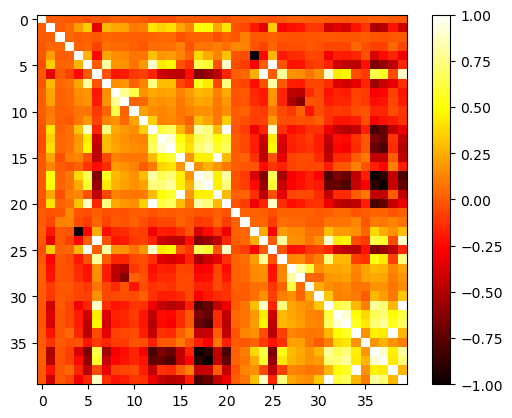

In [10]:
#Creating an initial corrilation graph
corr_matrix = df.corr()
plt.imshow(corr_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

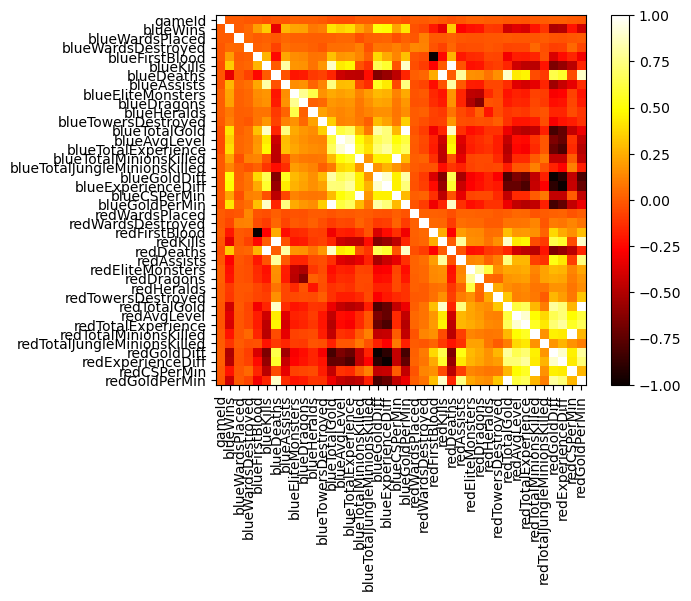

In [11]:
#Applying the names to the correlation graph
plt.imshow(corr_matrix, cmap='hot', interpolation='nearest')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.colorbar()
plt.show()

In [13]:
#Looking at correlation between first blood and gold difference
corr = df[['blueFirstBlood', 'blueGoldDiff']].corr().iloc[0, 1]
print('Correlation between blueFirstBlood and blueGoldDiff:', corr)

Correlation between blueFirstBlood and blueGoldDiff: 0.3785110250406428


In [14]:
#Looking at gold difference in games where blue did not get first blood
firstbloodgroup = df.groupby('blueFirstBlood')['blueGoldDiff'].mean()
print(firstbloodgroup)

blueFirstBlood
0   -923.131439
1    934.099860
Name: blueGoldDiff, dtype: float64


In [15]:
#checking to see if any games had no first blood
nofirstblood = ((df['blueFirstBlood'] == 0) & (df['redFirstBlood'] == 0)).sum()

print('Number of games with no first blood:', nofirstblood)

Number of games with no first blood: 0


In [16]:
#Checking the number of first blood for blue and red team
bluenofirstblood = (df['blueFirstBlood'] == 0).sum()
rednofirstblood = (df['redFirstBlood'] == 0).sum()

print('Red:', rednofirstblood, 'Blue:', bluenofirstblood)

Red: 4987 Blue: 4892


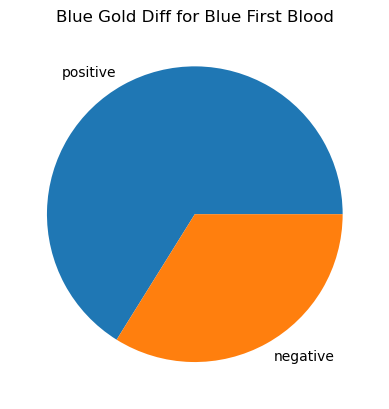

In [17]:
#Graphing what percent of games blue had positive vs negative gold diff after getting first blood
bluegetsfirstblood = df['blueFirstBlood'] == 1
counts = df.loc[bluegetsfirstblood, 'blueGoldDiff'].apply(lambda x: 'positive' if x >= 0 else 'negative').value_counts()
plt.pie(counts, labels=counts.index)
plt.title('Blue Gold Diff for Blue First Blood')
plt.show()

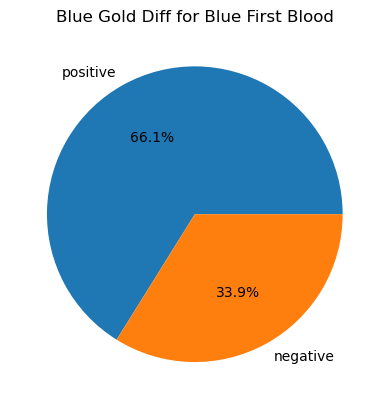

In [18]:
#to add percents to the pie chart
bluegetsfirstblood = df['blueFirstBlood'] == 1
counts = df.loc[bluegetsfirstblood, 'blueGoldDiff'].apply(lambda x: 'positive' if x >= 0 else 'negative').value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Blue Gold Diff for Blue First Blood')
plt.show()

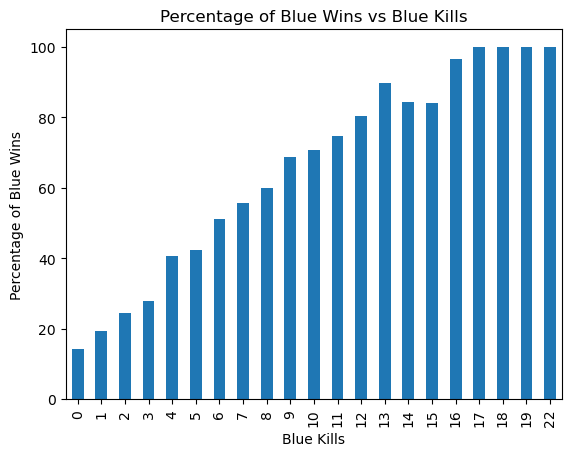

In [27]:
#showing the win percent based on number of kills
percentage = df.groupby('blueKills')['blueWins'].mean() * 100
percentage.plot(kind='bar')
plt.xlabel('Blue Kills')
plt.ylabel('Percentage of Blue Wins')
plt.title('Percentage of Blue Wins vs Blue Kills')
plt.show()

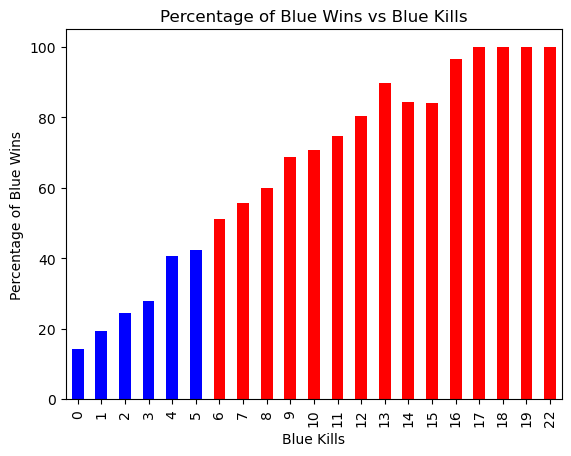

In [28]:
#changing it so that the color is different when over 50% win rate
percentage = df.groupby('blueKills')['blueWins'].mean() * 100
colors = ['red' if x > 50 else 'blue' for x in percentage]
percentage.plot(kind='bar',color=colors)
plt.xlabel('Blue Kills')
plt.ylabel('Percentage of Blue Wins')
plt.title('Percentage of Blue Wins vs Blue Kills')
plt.show()

In [29]:
#Finding the average number of kills blue gets when it wins 
blue_wins_df = df[df['blueWins'] == 1]
blue_kills_mean = blue_wins_df['blueKills'].mean()
print("Average number of kills in win: ", blue_kills_mean)

Average number of kills in win:  7.201622718052739


In [30]:
#finding the highest and lowest gold difference 
lowest_gold_diff = df['blueGoldDiff'].min()
highest_gold_diff = df['blueGoldDiff'].max()

print('Min: ',lowest_gold_diff,' Max: ',highest_gold_diff)

Min:  -10830  Max:  11467


In [34]:
#finding the highest correlation to wins
correlations = df.corr()['blueWins'].sort_values(ascending=False)
print(correlations)

blueWins                        1.000000
blueGoldDiff                    0.511119
blueExperienceDiff              0.489558
blueTotalGold                   0.417213
blueGoldPerMin                  0.417213
blueTotalExperience             0.396141
blueAvgLevel                    0.357820
blueKills                       0.337358
redDeaths                       0.337358
blueAssists                     0.276685
blueCSPerMin                    0.224909
blueTotalMinionsKilled          0.224909
blueEliteMonsters               0.221944
blueDragons                     0.213768
blueFirstBlood                  0.201769
blueTotalJungleMinionsKilled    0.131445
blueTowersDestroyed             0.115566
blueHeralds                     0.092385
blueWardsDestroyed              0.044247
gameId                          0.000985
blueWardsPlaced                 0.000087
redWardsPlaced                 -0.023671
redWardsDestroyed              -0.055400
redHeralds                     -0.097172
redTowersDestroy

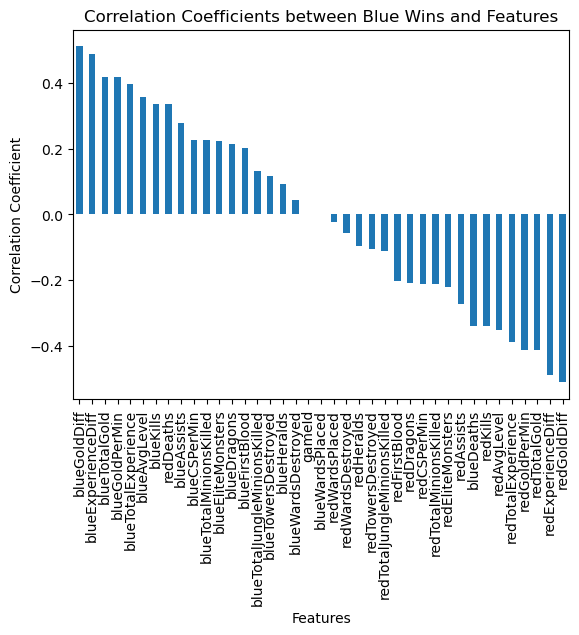

In [35]:
#Charting correlation between blue wins and all features
correlations = df.corr()['blueWins'].sort_values(ascending=False)
correlations = correlations.drop('blueWins')  # drop the correlation with itself
ax = correlations.plot(kind='bar')
ax.set_xlabel('Features')
ax.set_ylabel('Correlation Coefficient')
ax.set_title('Correlation Coefficients between Blue Wins and Features')
plt.show()